
    Yudha Cipta M. Y.
    Hacktiv8 - Batch 01
   

##### introduction

This is data from a Portuguese bank. The aim is to predict if the client will subscribe a bank term deposit.

We have 41K rows and 20 features. 

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. So first, we will find them all. Then will impute them with methodology what that feature needs.

the dataset originally from: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### explanation for features

###### bank client data:
1. age 
2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

###### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone") 
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

###### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

###### target feature
21. y - has the client subscribed a term deposit? (binary: "yes","no")

### import library

In [55]:
#Data exploration
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as st

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, accuracy_score
import time
from sklearn.cluster import KMeans
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Loading

In [56]:
url = 'https://raw.githubusercontent.com/ycmy28/dashboard-supermarket-sales/main/bank-additional-full.csv'
df = pd.read_csv(url, sep = ';')
# Dataset is now stored in a Pandas Dataframe

In [3]:
#df = pd.read_csv("https://drive.google.com/drive/folders/1tU6ZyZwaeCfifbyvZcuO4zJVnGs7TylD", sep = ';')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Cleaning

In [7]:
df.duplicated().any()

True

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

fortunately there are no missing value

In [10]:
#remake column
df.columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
            'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 
            'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

### Data Exploration

In [11]:
#explore data with new definition df_eda
df_eda = pd.read_csv("bank-additional-full.csv", sep = ';')
df_eda

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


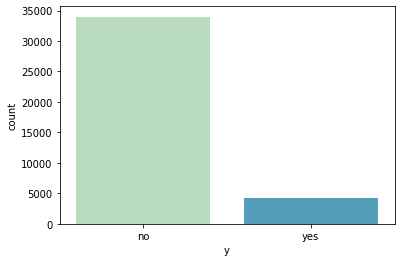

In [12]:
#drop column with unknow values for visualization EDA
def drop(column):

    df_eda[column].replace('unknown', np.nan, inplace=True)
    df_eda.dropna(inplace=True)

drop('job')
drop('marital')
drop('education')
drop('housing')

sns.countplot(data=df_eda, x='y',palette='GnBu')
plt.show()

In [13]:
#defining categorical
cat = df_eda.select_dtypes('object').columns.to_list()
cat = cat[:-1]

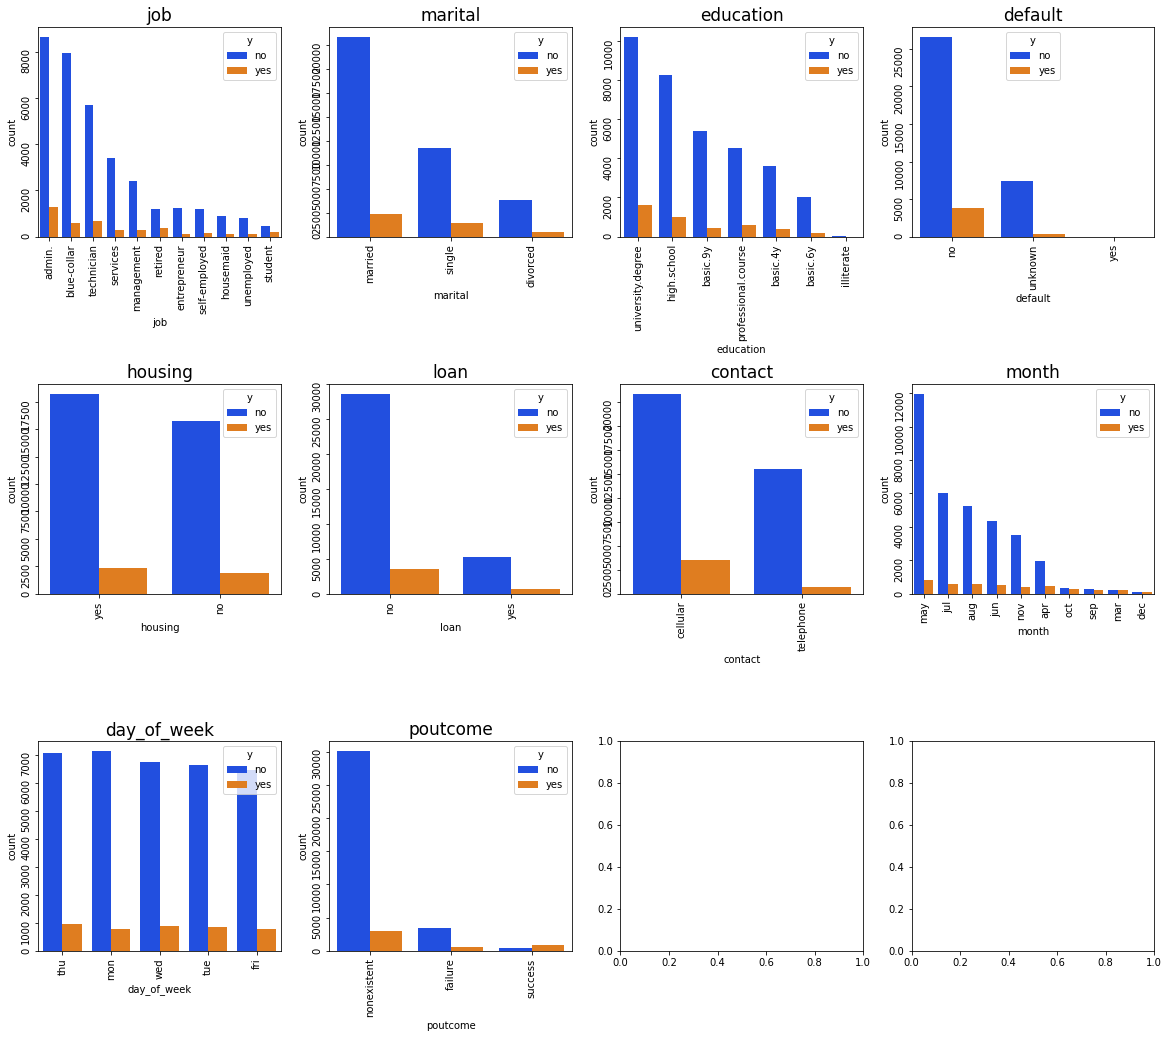

In [14]:
fig, ax = plt.subplots(3,4, figsize=(20,17))

cat = df_eda.select_dtypes('object').columns.to_list()
cat = cat[:-1]

ax = ax.ravel()
position = 0

for i in cat:
    
    order = df_eda[i].value_counts().index
    sns.countplot(data=df_eda, x=i, ax=ax[position], hue='y', palette='bright', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

- We have a clear imbalanced data problem: the target feature 'y' is dominated by 'no's. When building the classification algorithm we will have to apply an oversampling method to avoid the model predicting based on size.
- 'yes' in 'bcontacted' is also bigger in this feature, but the sample is also quite small

distribution check

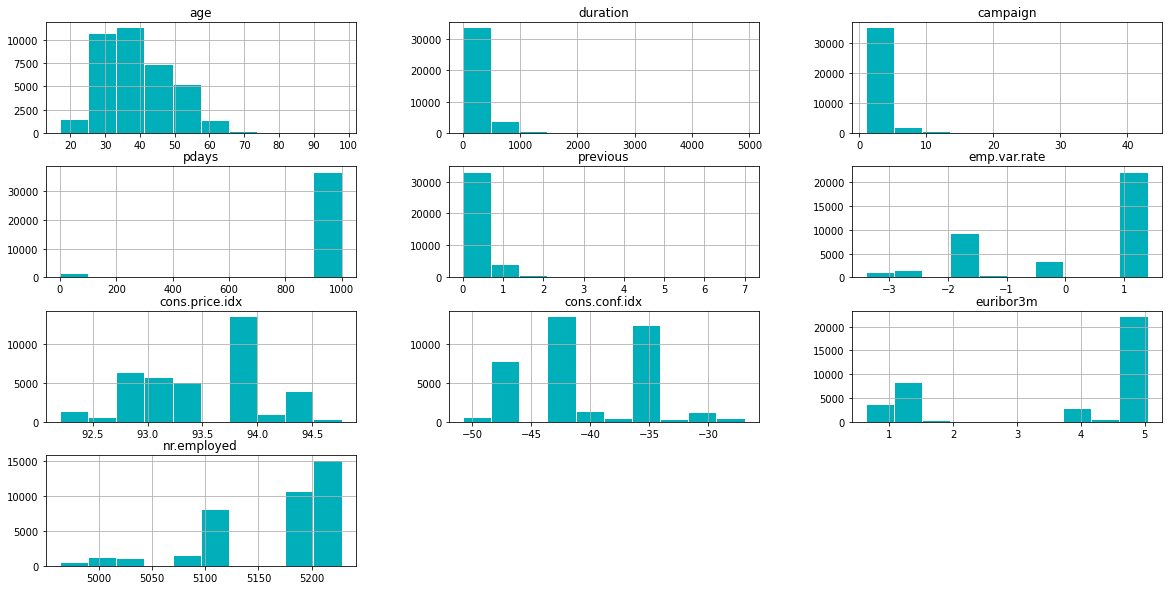

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,963.531651,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,184.295254,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
numbers = df_eda.select_dtypes(['int64', 'float64']).columns.to_list()

df_eda.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

display(df_eda[numbers].describe())

correlations check

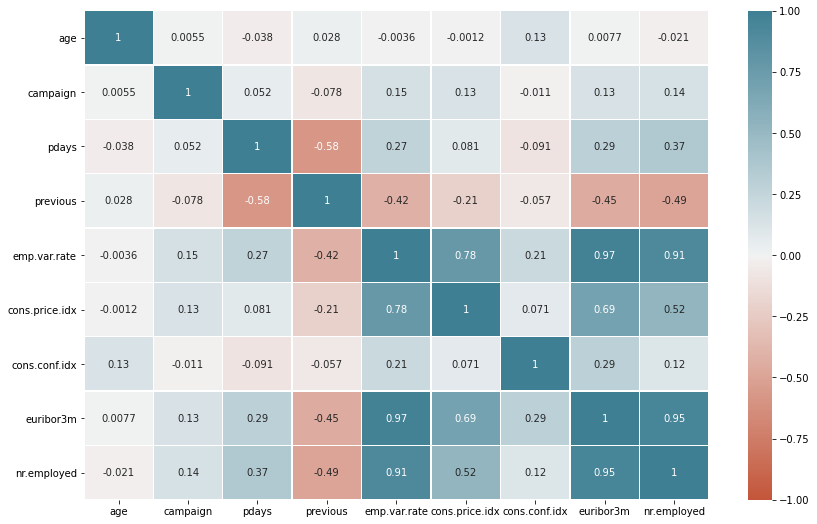

In [16]:
df_eda.drop(['duration'], axis=1, inplace=True)
numbers = df_eda.select_dtypes(['int64', 'float64']).columns.to_list()

fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df_eda[numbers].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

##### EDA conclusion
- Overall, most of the features don't show an evident trend towards 'yes'. The found trends were based mainly on absolute values and not on proportion. The fact that we have imbalanced data doesn't help either.
- high correlation pairs on correlation graph are not relevant since they are not target variables.  
- attribute like 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' don't show any apparent distribution, probably they won't be that useful for the model later, taking also into account that they arent under the control of the bank.

visualization simplify with function

In [17]:
#make a function 'histogram' to help with visualization
def histogram(df,feature, xlabel='Target Segments', ylabel='Number of Observations',
              title='Histogram of Binary Target Categories'):
    import matplotlib.ticker as ticker
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    
    # Make twin axis
    ax2=ax.twinx()
    
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') 
        # set the alignment of the text
        
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title(title, fontsize=20, y=1.08)
    plt.show();
    del ncount, x, y

### Data Preprocessing

transform data and converting datatype

In [18]:
#transforming strings to 1 and 0
df["housing"]=df["housing"].replace("yes", 1)
df["housing"]=df["housing"].replace("no", 0)

df["loan"]=df["loan"].replace("yes", 1)
df["loan"]=df["loan"].replace("no", 0)   

df["y"]=df["y"].replace("yes",1)
df["y"]=df["y"].replace("no",0)

In [19]:
# convert datatype
df["job"]=df["job"].astype("category")
df["marital"]=df["marital"].astype("category")
df["default"]=df["default"].astype("category")
df["housing"]=df["housing"].astype("category")
df["loan"]=df["loan"].astype("category")
df["contact"]=df["contact"].astype("category")
df["month"]=df["month"].astype("category")
df["day_of_week"]=df["day_of_week"].astype("category")

In [20]:
#convert object to categorical variable
educationOrder=CategoricalDtype(categories=["illiterate","basic.4y","basic.6y","basic.9y","high.school",
                                            "university.degree","professional.course"],ordered=True)
df["education"]=df["education"].astype(educationOrder)
poutcomeOrder=CategoricalDtype(categories=["nonexistent","failure","success"],ordered=True)
df["poutcome"]=df["poutcome"].astype(poutcomeOrder)

numerical and categorical columns preparation

In [21]:
numerical_columns=["age", "duration", "campaign", "pdays", "previous", "emp_var_rate", 
                   "cons_price_idx", "cons_conf_idx", "nr_employed"]

categoricalColumns=['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome', 'euribor3m',]

In [22]:
#convert floats to int
df['nr_employed']=[int(x) for x in df['nr_employed']]

check distribution pdays

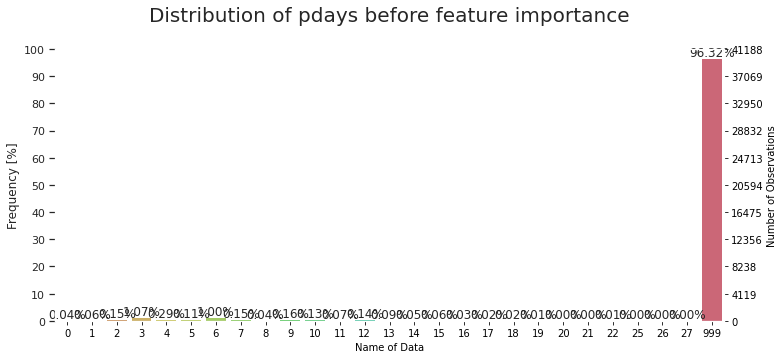

In [23]:
histogram(df,"pdays",xlabel="Name of Data", title="Distribution of pdays before feature importance")

95% of this line has a value of 999. The remainder has different values. So let's convert them to binary values 999 ->1 others ->0

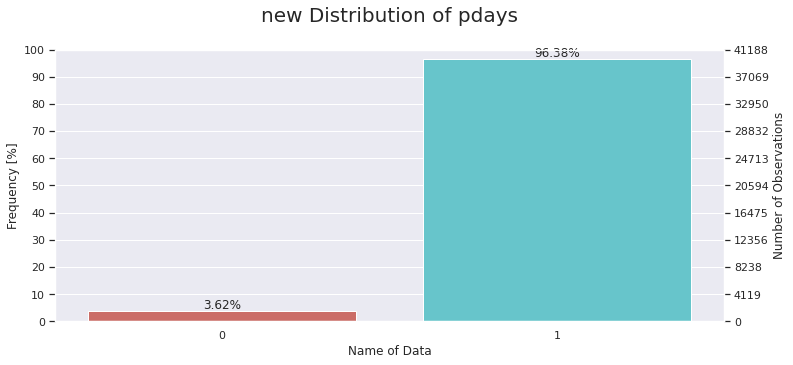

In [24]:
df.loc[(df.pdays==999),"pdays"]=1 # Main DF changed
df.loc[(df.pdays!=1),"pdays"]=0 # Main DF changed

#check again distribution after feature importance
histogram(df,"pdays",xlabel="Name of Data", title="new Distribution of pdays")

Model Definition and Training

In [57]:
X = df.drop("y", axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((30891, 20), (10297, 20), (30891,), (10297,))

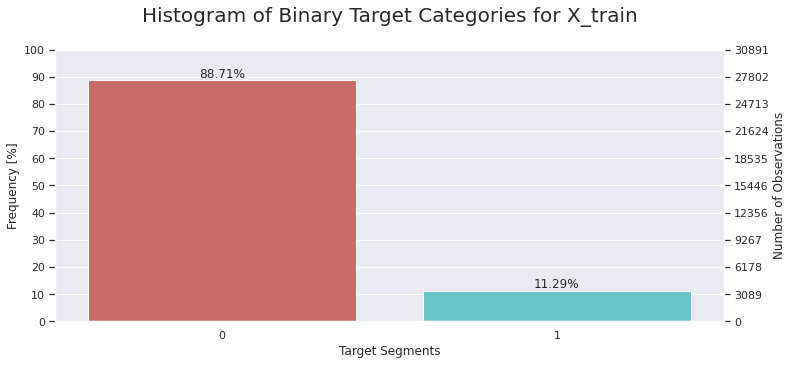

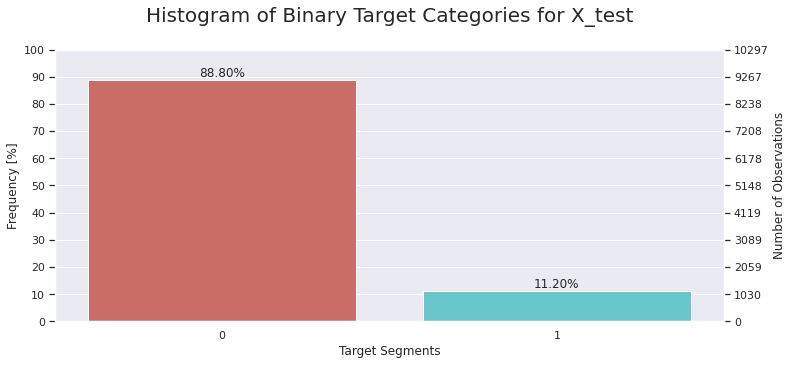

In [26]:
histogram(X_train,y_train, title="Histogram of Binary Target Categories for X_train")
histogram(X_test,y_test, title="Histogram of Binary Target Categories for X_test")

Encoding

In [58]:
#using function to encoding feature
def binaryEncoding(df,column):
    from category_encoders import BinaryEncoder
    encoder=BinaryEncoder(cols=[column])
    df=encoder.fit_transform(df)
    return df

def oneHotEncoding(df,column):
    from category_encoders import OneHotEncoder
    encoder=OneHotEncoder(cols=[column])
    df = encoder.fit_transform(df)
    return df

def encodingForCategoricalFeature(df,categoricalColumns):
    for element in categoricalColumns:
        if len(df[element].unique())<=5:
            df=oneHotEncoding(df,element)
        else:
            df=binaryEncoding(df,element)
    return df

X_train=encodingForCategoricalFeature(X_train,categoricalColumns)
X_test=encodingForCategoricalFeature(X_test,categoricalColumns)

normalization

In [28]:
from sklearn import preprocessing
X_train.loc[:,numerical_columns]=preprocessing.normalize(X_train.loc[:,numerical_columns])
X_test.loc[:,numerical_columns]=preprocessing.normalize(X_test.loc[:,numerical_columns])

feature importance using random forest classifier

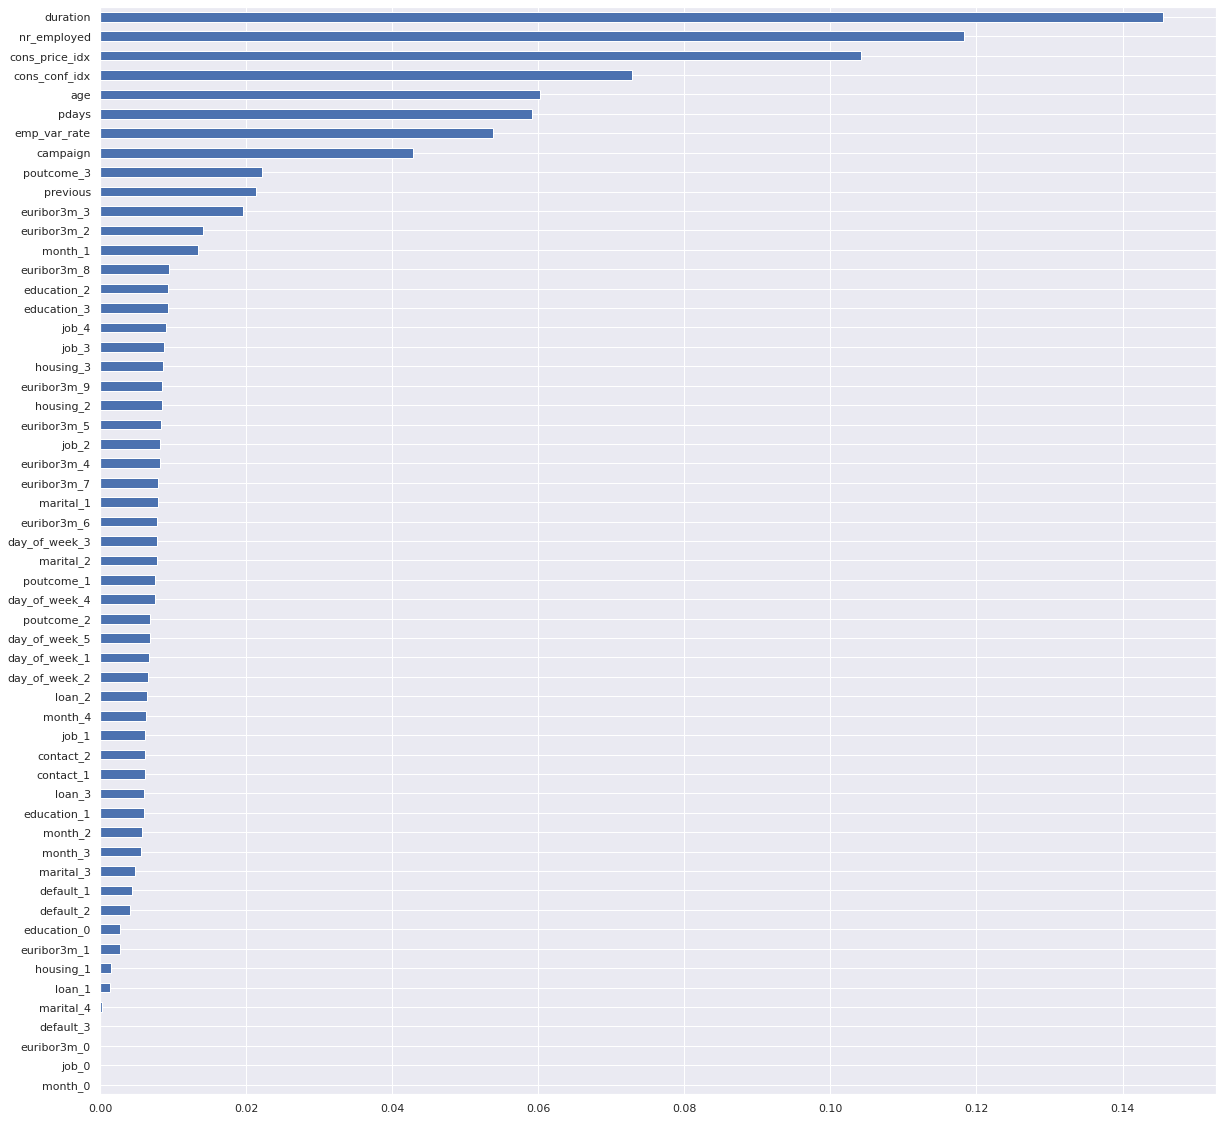

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(20,20))
plt.show();

In [30]:
#cleaning the variable that has no relation
X_train.drop(labels=["euribor3m_0", "month_0", "default_2", "education_0", "job_0"],axis=1,inplace=True)
X_test.drop(labels=["euribor3m_0", "month_0", "default_2", "education_0", "job_0"],axis=1,inplace=True)

Correlation Matrix

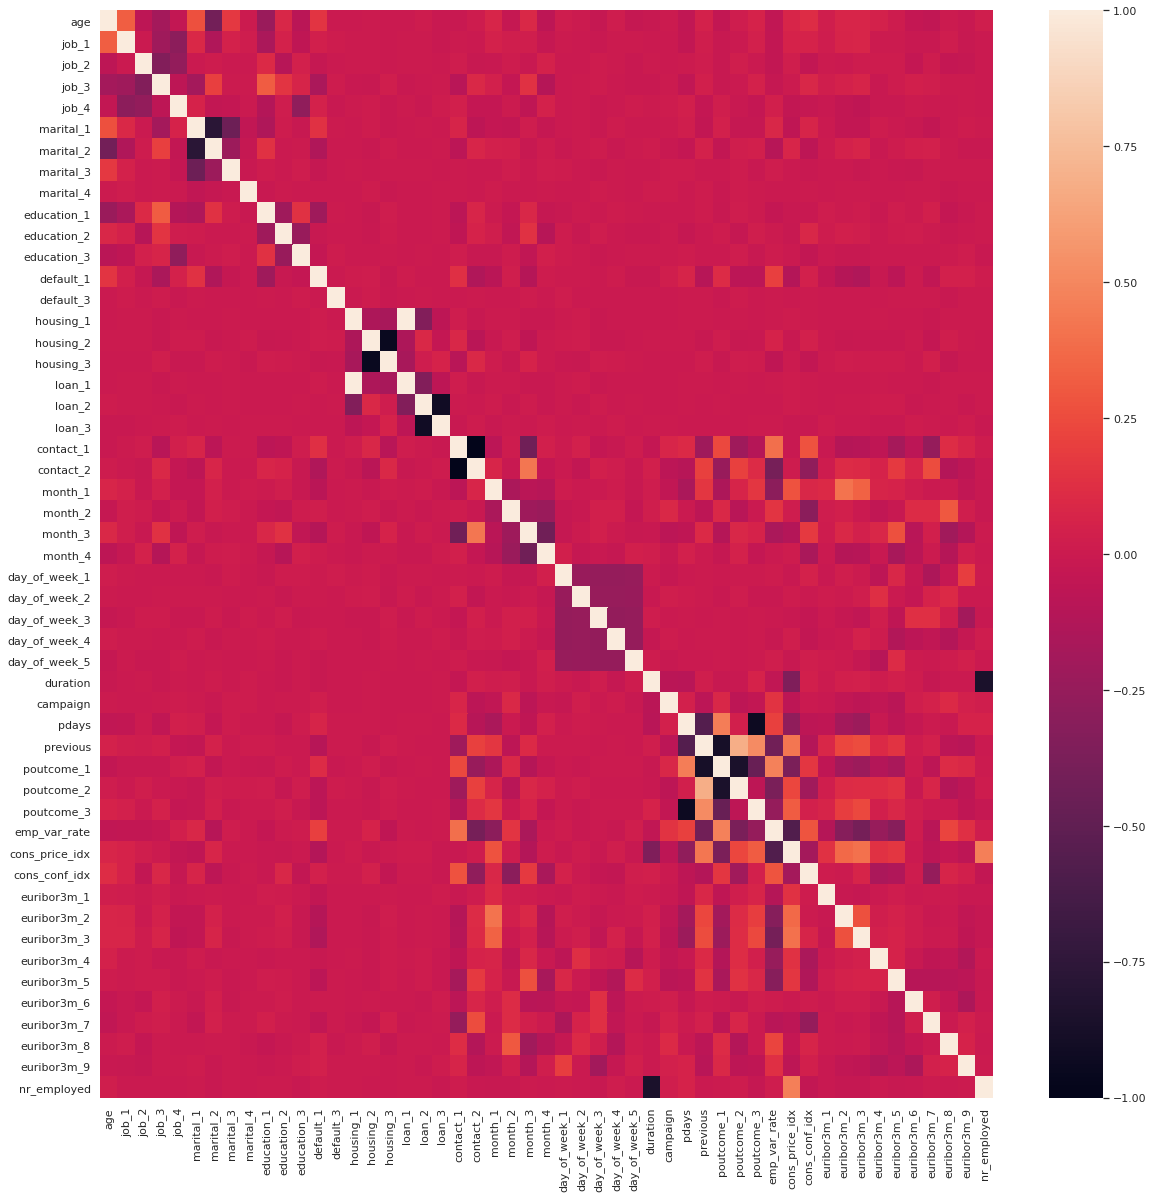

In [31]:
plt.subplots(figsize=(20,20))
sns.heatmap(X_train.corr())
plt.show();

### Model Definition and Training

In [32]:
def models(X_train,Y_train):
    
    #use logistic regression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #use KNeighbors
    knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
      
    #use SVC (RBF kernel)
    svc_rbf=SVC(kernel="rbf",random_state=0,probability=True)
    svc_rbf.fit(X_train,Y_train)
    
    #use GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #use Decision Tree
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,Y_train)
    
    #use Random Forest Classifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    # use Hist Gradient Boosting Classifier
    from sklearn.experimental import enable_hist_gradient_boosting
    from sklearn.ensemble import HistGradientBoostingClassifier
    histgrad=HistGradientBoostingClassifier()
    histgrad.fit(X_train,y_train)
    
    # use GBM
    from sklearn.ensemble import GradientBoostingClassifier
    gbm=GradientBoostingClassifier()
    gbm.fit(X_train,y_train)
    
    # use XGBoost
    xgboost=XGBClassifier()
    xgboost.fit(X_train,y_train)
    
    # use LightGBM

    lightgbm=LGBMClassifier()
    lightgbm.fit(X_train,y_train)

    #print the training scores for each model
    print('[0] Logistic Regression Training Score:',log.score(X_train,Y_train))
    print('\n[1] K Neighbors Training Score:',knn.score(X_train,Y_train))
    print('\n[2] SVC RBF Training Score:',svc_rbf.score(X_train,Y_train))
    print('\n[3] Gaussian Training Score:',gauss.score(X_train,Y_train))
    print('\n[4] Decision Tree Training Score:',tree.score(X_train,Y_train))
    print('\n[5] Random Forest Training Score:',forest.score(X_train,Y_train))
    print('\n[6] Hist Gradient Boosting Training Score:',histgrad.score(X_train,Y_train))
    print('\n[7] Gradient Boosting Training Score:',gbm.score(X_train,Y_train))
    print('\n[8] XGBoost Training Score:',xgboost.score(X_train,Y_train))
    print('\n[9] Light GBM Training Score:',lightgbm.score(X_train,Y_train))
    
    return log,knn,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm

In [33]:
log,knn,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm=models(X_train,y_train)

[0] Logistic Regression Training Score: 0.9065747305040303

[1] K Neighbors Training Score: 0.9158007186559192

[2] SVC RBF Training Score: 0.9017836910426985

[3] Gaussian Training Score: 0.8204655077530673

[4] Decision Tree Training Score: 1.0

[5] Random Forest Training Score: 0.9944320352206144

[6] Hist Gradient Boosting Training Score: 0.9416982292577126

[7] Gradient Boosting Training Score: 0.9209154769997734

[8] XGBoost Training Score: 0.9173545692920269

[9] Light GBM Training Score: 0.9421838075814962


### Evaluasi Model

Roc and Accuracy score

In [34]:
models=[log,knn,svc_rbf,gauss,tree,forest,histgrad,gbm,xgboost,lightgbm]
models_name=["log","knn","svc_rbf","gauss","tree","forest","histgrad","gbm","xgboost","lightgbm"]

In [35]:
#function acc score before tuning
before_tune_accuracy_score={}
def accuracy_score_calculator(model,model_name):
    from sklearn.metrics import accuracy_score
    y_pred=model.predict(X_test)
    before_tune_accuracy_score[model_name]=accuracy_score(y_test,y_pred)

In [36]:
#function acc score before tuning
before_tune_roc_score={}
def roc_score_calculator(model,model_name):
    from sklearn.metrics import roc_auc_score
    y_pred=model.predict_proba(X_test)[:,1]
    before_tune_roc_score[model_name]=roc_auc_score(y_test,y_pred)

In [37]:
for i in range(len(models)):
    roc_score_calculator(models[i],models_name[i])
    accuracy_score_calculator(models[i],models_name[i])

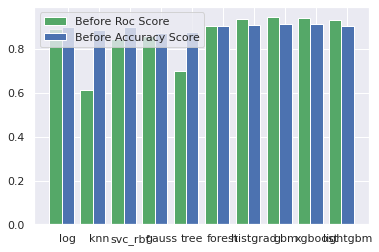

In [38]:
size=np.arange(len(models))
plt.ylabel="Percentage"
plt.bar(size-0.2, before_tune_roc_score.values(), color='g', width=0.4,tick_label=models_name)
plt.bar(size+0.2, before_tune_accuracy_score.values(),color='b', width=0.4,tick_label=models_name)
plt.legend(["Before Roc Score", "Before Accuracy Score"]);

ROC Curve Visualization

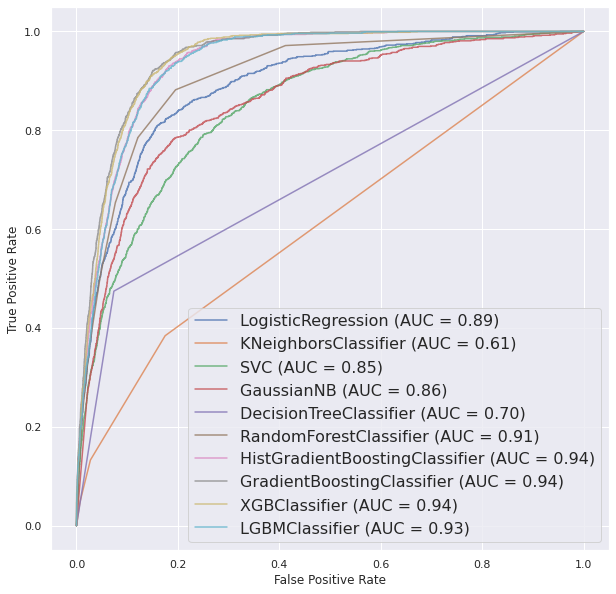

In [39]:
plt.figure(figsize=(10,10))
ax = plt.gca()
log_disp = plot_roc_curve(log, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
svc_rbf_disp = plot_roc_curve(svc_rbf, X_test, y_test, ax=ax, alpha=0.8)
gauss_disp = plot_roc_curve(gauss, X_test, y_test, ax=ax, alpha=0.8)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax=ax, alpha=0.8)
forest_disp = plot_roc_curve(forest, X_test, y_test, ax=ax, alpha=0.8)
histgrad_disp = plot_roc_curve(histgrad, X_test, y_test, ax=ax, alpha=0.8)
gbm_disp = plot_roc_curve(gbm, X_test, y_test, ax=ax, alpha=0.8)
xgboost_disp = plot_roc_curve(xgboost, X_test, y_test, ax=ax, alpha=0.8)
lightgbm_disp = plot_roc_curve(lightgbm, X_test, y_test, ax=ax, alpha=0.8)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

from the roc curve and histogram graph that compared models, we can conclude the best result for this dataset is by using Light GBM, next let's cross validation before tuning the model

In [40]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_scores = cross_val_score(log, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# KNearestNeighbors
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# SVC
svc_scores = cross_val_score(svc_rbf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# Naives Bayes
nb_scores = cross_val_score(gauss, X_train, y_train, cv=3)
nb_mean = nb_scores.mean()

# Decision Tree
tree_scores = cross_val_score(tree, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Random Forest Classifier
rf_scores = cross_val_score(forest, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()

# histgrad
hg_scores = cross_val_score(histgrad, X_train, y_train, cv=3)
hg_mean = hg_scores.mean()

# GBM
gbm_scores = cross_val_score(gbm, X_train, y_train, cv=3)
gbm_mean = gbm_scores.mean()

# xgboost
xgb_scores = cross_val_score(xgboost, X_train, y_train, cv=3)
xgb_mean = xgb_scores.mean()

# lightgbm
lightgbm_scores = cross_val_score(lightgbm, X_train, y_train, cv=3)
lightgbm_mean = lightgbm_scores.mean()


In [41]:
# Create a Dataframe with the results.
dfcv = {'Classifiers': ['Logistic Regression', 'KNN', 'SVC', 'Naives Bayes', 'Decision Tree', 'RandForest', 'Histgrad', 'GBM', 'XGboost', 'Lightgbm'], 
    'Crossvalidation Mean Scores': [log_reg_mean, knn_mean, svc_mean , nb_mean , tree_mean , rf_mean , hg_mean, gbm_mean, xgb_mean, lightgbm_mean]}

result = pd.DataFrame(dfcv)
crosval_result = result.sort_values(by=['Crossvalidation Mean Scores'], ascending=False)
crosval_result

,Classifiers,Crossvalidation Mean Scores
6,Histgrad,0.914894
9,Lightgbm,0.913826
7,GBM,0.912823
8,XGboost,0.912499
5,RandForest,0.906445
0,Logistic Regression,0.905474
2,SVC,0.897899
1,KNN,0.894371
4,Decision Tree,0.888932
3,Naives Bayes,0.821760


#### Model Tuning

##### Lgbm Classifier

In [42]:
#setting parameter
from sklearn.model_selection import GridSearchCV
lgbm_params={'n_estimators':[100, 500, 1000, 2000],
            'subsample':[0.6,0.8, 1.0], 'max_depth':[3,4,5,6],
            'learning_rate':[0.1, 0.01,0.02, 0.05], 'min_child_samples':[5,10,20]}
            
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=3,n_jobs=-1,verbose=2)
lgbm_cv_model.fit(X_train,y_train)
lgbm_cv_model.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 46.2min finished


{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_samples': 20,
 'n_estimators': 1000,
 'subsample': 0.6}

In [43]:
#score
after_tune_roc_scores={}
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate= 0.1 , max_depth= 6, subsample= 0.6, n_estimators= 100, min_child_samples= 10)
lgbm_tuned=lgbm.fit(X_train,y_train)
y_pred=lgbm_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["Light GBM Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.9388993602599327

##### XGBoost Classifier

In [50]:
#setting parameter
from sklearn.model_selection import GridSearchCV
xgb_params={'n_estimators':[100, 500, 1000, 1500],
            'subsample':[0.6,0.8, 1.0], 'max_depth':[3,4,5,6],
            'learning_rate':[0.1, 0.01,0.02, 0.05], 'min_samples_split':[2,5,10]}
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=2,n_jobs=-1,verbose=2)
xgb_cv_model.fit(X_train,y_train)
xgb_cv_model.best_params_

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 53.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 97.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 156.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 187.9min finished


{'learning_rate': 0.02,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 1.0}

In [51]:
#score
xgb=XGBClassifier()
xgb_tuned=xgb.fit(X_train,y_train)
y_pred=xgb_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["XGBoost Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.9425327552832999

##### Histogram-based Gradient Boosting Classification Tree

In [52]:
#setting parameter
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
histgrad_params={'max_depth':[4,6,8], 'max_leaf_nodes':np.arange(0,20), 'learning_rate':[0.1, 0.01]}
histgrad=HistGradientBoostingClassifier()
histgrad_cv_model=GridSearchCV(histgrad,histgrad_params,cv=3,n_jobs=-1)
histgrad_cv_model.fit(X_train,y_train)
histgrad_cv_model.best_params_


{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 12}

In [53]:
#score
histgrad=HistGradientBoostingClassifier(max_depth=8,max_leaf_nodes=15,learning_rate=0.1)
histgrad_tuned=xgb.fit(X_train,y_train)
y_pred=histgrad_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["Histogram Gradient Boosting"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.9425327552832999

##### Gradient Boosting Classifier

In [59]:
#setting parameter
gbm_params={'learning_rate':[0.001, 0.01,0.1, 0.05], 'n_estimators':[100, 500, 1000],
             'max_depth':[3, 5, 10], 'min_samples_split':[2,5,10]}
             
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=2,n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_train,y_train)
gbm_cv_model.best_params_


Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 42.6min finished


{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 500}

In [66]:
#score
gbm=GradientBoostingClassifier()
gbm_tuned=gbm.fit(X_train,y_train)
y_pred=gbm_tuned.predict_proba(X_test)[:,1]
after_tune_roc_scores["Gradient Boosting Classifier"]=roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.9416851338400567

ROC Curve from 4 models

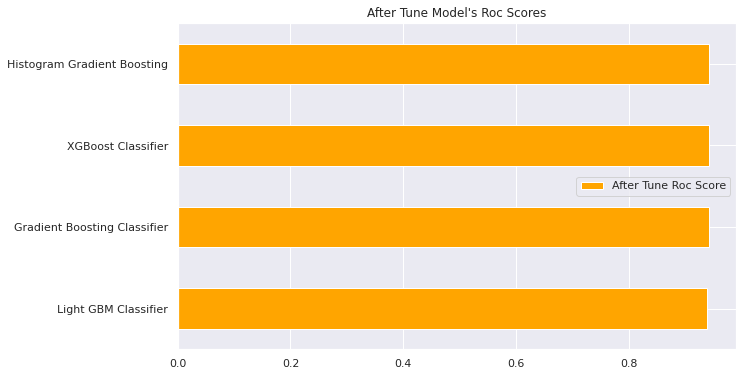

In [67]:
roc_curve_values_df=pd.DataFrame.from_dict(after_tune_roc_scores, orient='index',columns=["After Tune Roc Score"])
roc_curve_values_df = roc_curve_values_df.sort_values(by=['After Tune Roc Score'])
roc_curve_values_df.plot(kind='barh', y='After Tune Roc Score', color="orange", figsize=(10,6), title="After Tune Model's Roc Scores");

In [68]:
roc_curve_values_df.index=["gbm", "xgboost", "histgrad", "lightgbm" ]
before_tune_roc_score_df=pd.DataFrame.from_dict(before_tune_roc_score,orient='index', columns=["Before Tune Roc Score"])
before_tune_roc_score_df

,Before Tune Roc Score
log,0.889750
knn,0.611172
svc_rbf,0.848113
gauss,0.858204
tree,0.700298
forest,0.906167
histgrad,0.935485
gbm,0.944862
xgboost,0.942533
lightgbm,0.934389


Roc and Accuracy Score After Tune

In [69]:
final_scores=pd.concat([roc_curve_values_df, before_tune_roc_score_df], axis=1)
final_scores.dropna(inplace=True)
final_scores

,After Tune Roc Score,Before Tune Roc Score
gbm,0.938899,0.944862
xgboost,0.941685,0.942533
histgrad,0.942533,0.935485
lightgbm,0.942533,0.934389


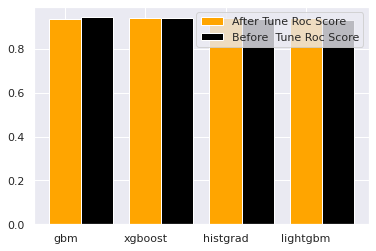

In [70]:
size=np.arange(len(final_scores))
plt.ylabel="Percentage"
plt.bar(size-0.2, list(final_scores["After Tune Roc Score"].values), color='orange', width=0.4, 
        tick_label=final_scores["After Tune Roc Score"].index)
plt.bar(size+0.2, list(final_scores["Before Tune Roc Score"].values), color='black', width=0.4)
plt.legend(["After Tune Roc Score", "Before  Tune Roc Score"]);

from the roc curve and the graph after tuning the best result for this dataset is by using Light GBM

### Model Saving

In [71]:
import pickle
pickle.dump(log, open('model_classifier.pkl','wb'))

### Conclusion

Overall, most of the features don't show an evident trend towards 'yes'. The found trends were based mainly on absolute values and not on proportion. The fact that we have imbalanced data doesn't help either. And high correlation pairs on correlation graph are not relevant since they are not target variables because of several attribute that have unknown values.

as for the modelused for this dataset, which is:

1. Logistic Regression
2. KNeighbors Classifier
3. SVC (RBF)
4. Naive Bayes
5. Decision Tree Classifier
6. Random Forest Classifier
7. Hist Gradient Boosting Classifier
8. Gradient Boosting Classifier
9. XGBoost Classifier
10. Ligth GBM Classifier

we got the best result for crossvalidation by using hist gradient boostin and light GBM after tuning, while tuning with gridsearch is really time consuming, we can't exactly make an assumption what is the best model for this dataset but at least we can compare model available which turns out Lightgbm comes first